In [1]:
from ase.io import read
import matplotlib.pyplot as plt
import numpy as np

# 1. Loading the target and predicted data

In [2]:
TARGET_ATOMS_PATH = "../common/matbench-sample/matbench-sample-test.xyz"
PREDICTED_ATOMS_PATH = "matbench-sample-test-predictions.xyz"

target_atoms = read(TARGET_ATOMS_PATH, ":")
predicted_atoms = read(PREDICTED_ATOMS_PATH, ":")

target_energies = np.array([item.get_potential_energy() for item in target_atoms])
predicted_energies = np.array([item.get_potential_energy() for item in predicted_atoms])

num_atoms = np.array([len(item) for item in target_atoms])
target_energies_per_atom = target_energies / num_atoms
predicted_energies_per_atom = predicted_energies / num_atoms

mae = np.mean(np.abs(target_energies_per_atom - predicted_energies_per_atom)) * 1000  # Convert to meV/atom

# 2. Plotting the energies pairplot

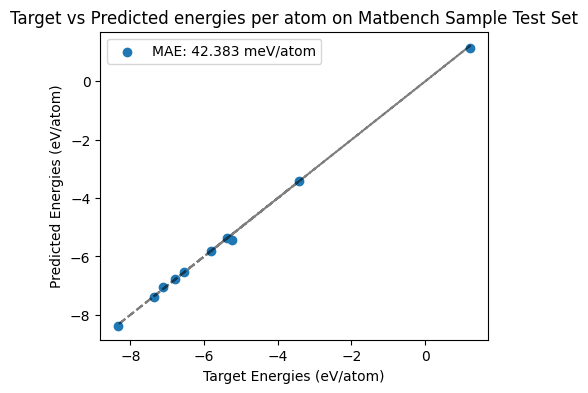

In [4]:
plt.figure(figsize=(5, 4))
plt.scatter(target_energies_per_atom, predicted_energies_per_atom, label='MAE: {:.3f} meV/atom'.format(mae))
plt.plot(target_energies_per_atom, target_energies_per_atom, color='k', linestyle='--', alpha=0.5)
plt.xlabel('Target Energies (eV/atom)')
plt.ylabel('Predicted Energies (eV/atom)')
plt.title('Target vs Predicted energies per atom on Matbench Sample Test Set')
plt.legend()
plt.show()